Today you will learn:

How to visualise your data and create charts with Matplotlib

How to pivot, group and manipulate your data with Pandas to get it into the format you want

How to work with timestamps and time-series data

How to style and customise a line chart to your liking

with count number of tags in stackoverflow for each programming languge

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [4]:
import pandas as pd

In [5]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [46]:
df = pd.read_csv('QueryResults.csv', names= ['DATE', 'TAG', 'POST'], header=0) # read a csv file and write it in Dataframe 

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [47]:
df.head() # for see first 5 rows

,DATE,TAG,POST
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [48]:
df.tail(5) # for see first 5 rows

,DATE,TAG,POST
2309,2022-06-01 00:00:00,php,4043
2310,2022-06-01 00:00:00,python,23024
2311,2022-06-01 00:00:00,r,4524
2312,2022-06-01 00:00:00,ruby,491
2313,2022-06-01 00:00:00,swift,1862


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [49]:
dataframe_shape = df.shape
number_of_columns = len(df.columns)
number_of_rows = len(df.index)

**Challenge**: Count the number of entries in each column of the dataframe

In [50]:
column_name = df.columns[1] # get name of a sepecific column
get_entries = df['TAG'] # return all entries of a column

tagname_column_list = get_entries.tolist() # or in a dirtywat you can type df['TagName'].tolist()
tagname_column_array = get_entries.to_numpy() # or in a dirtywat you can type df['TagName'].to_numpy()

print(tagname_column_list)  # get enteries as list
print(tagname_column_array) # get enteries as array


# for count the number of entries you can get len of 'tagmane_column_list'

['c#', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'ruby', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'ruby', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'assembly', 'c', 'c#', 'c++', 'delphi', 'java', 'javascript', 'perl', 'php',

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

pandas.DataFrame.groupby¶

DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)[source]

    Group DataFrame using a mapper or by a Series of columns.

    A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [51]:
# calculate post per language
df.groupby('TAG').sum() # find all entries for each programming languege

,POST
TAG,
assembly,40605
c,381262
c#,1543713
c++,768076
delphi,49720
go,62229
java,1850111
javascript,2388130
perl,66824


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


<h1>SHOW ALL DATAFRAME IN OUTPUT:</h1>

In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                     DATE         TAG   POST
0     2008-07-01 00:00:00          c#      3
1     2008-08-01 00:00:00    assembly      8
2     2008-08-01 00:00:00           c     83
3     2008-08-01 00:00:00          c#    506
4     2008-08-01 00:00:00         c++    164
5     2008-08-01 00:00:00      delphi     14
6     2008-08-01 00:00:00        java    222
7     2008-08-01 00:00:00  javascript    164
8     2008-08-01 00:00:00        perl     28
9     2008-08-01 00:00:00         php    159
10    2008-08-01 00:00:00      python    120
11    2008-08-01 00:00:00        ruby     70
12    2008-09-01 00:00:00    assembly     28
13    2008-09-01 00:00:00           c    318
14    2008-09-01 00:00:00          c#   1647
15    2008-09-01 00:00:00         c++    753
16    2008-09-01 00:00:00      delphi    104
17    2008-09-01 00:00:00        java   1133
18    2008-09-01 00:00:00  javascript    637
19    2008-09-01 00:00:00        perl    130
20    2008-09-01 00:00:00         php    477
21    2008

In [13]:
df.groupby('TAG').count() # entrie per mounth

,DATE,POST
TAG,,
assembly,167,167
c,167,167
c#,168,168
c++,167,167
delphi,167,167
go,152,152
java,167,167
javascript,167,167
perl,167,167


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

df.loc[df[‘column name’] == ‘value’]

In [66]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [67]:
df.DATE[1]

'2008-08-01 00:00:00'

In [68]:
# now we want to change all rows  use datetime

In [69]:
df.DATE = pd.to_datetime(df.DATE)


In [70]:
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


To select rows whose column value equals a scalar, some_value, use ==:

df.loc[df['column_name'] == some_value]

To select rows whose column value is in an iterable, some_values, use isin:

df.loc[df['column_name'].isin(some_values)]

Combine multiple conditions with &:

df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

Note the parentheses. Due to Python's operator precedence rules, & binds more tightly than <= and >=. Thus, the parentheses in the last example are necessary. Without the parentheses

df['column_name'] >= A & df['column_name'] <= B

is parsed as

df['column_name'] >= (A & df['column_name']) <= B


which results in a Truth value of a Series is ambiguous error.

To select rows whose column value does not equal some_value, use !=:

df.loc[df['column_name'] != some_value]

isin returns a boolean Series, so to select rows whose value is not in some_values, negate the boolean Series using ~:

df.loc[~df['column_name'].isin(some_values)]

For example,

import pandas as pd
import numpy as np
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})
print(df)
#      A      B  C   D
# 0  foo    one  0   0
# 1  bar    one  1   2
# 2  foo    two  2   4
# 3  bar  three  3   6
# 4  foo    two  4   8
# 5  bar    two  5  10
# 6  foo    one  6  12
# 7  foo  three  7  14

print(df.loc[df['A'] == 'foo'])




To select rows whose column value equals a scalar, some_value, use ==:

df.loc[df['column_name'] == some_value]

To select rows whose column value is in an iterable, some_values, use isin:

df.loc[df['column_name'].isin(some_values)]

Combine multiple conditions with &:

df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]

Note the parentheses. Due to Python's operator precedence rules, & binds more tightly than <= and >=. Thus, the parentheses in the last example are necessary. Without the parentheses

df['column_name'] >= A & df['column_name'] <= B

is parsed as

df['column_name'] >= (A & df['column_name']) <= B

which results in a Truth value of a Series is ambiguous error.

To select rows whose column value does not equal some_value, use !=:

df.loc[df['column_name'] != some_value]

isin returns a boolean Series, so to select rows whose value is not in some_values, negate the boolean Series using ~:

df.loc[~df['column_name'].isin(some_values)]

For example,

import pandas as pd
import numpy as np
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})
print(df)
#      A      B  C   D
# 0  foo    one  0   0
# 1  bar    one  1   2
# 2  foo    two  2   4
# 3  bar  three  3   6
# 4  foo    two  4   8
# 5  bar    two  5  10
# 6  foo    one  6  12
# 7  foo  three  7  14

print(df.loc[df['A'] == 'foo'])

yields

     A      B  C   D
0  foo    one  0   0
2  foo    two  2   4
4  foo    two  4   8
6  foo    one  6  12
7  foo  three  7  14

If you have multiple values you want to include, put them in a list (or more generally, any iterable) and use isin:

print(df.loc[df['B'].isin(['one','three'])])

yields

     A      B  C   D
0  foo    one  0   0
1  bar    one  1   2
3  bar  three  3   6
6  foo    one  6  12
7  foo  three  7  14

Note, however, that if you wish to do this many times, it is more efficient to make an index first, and then use df.loc:

df = df.set_index(['B'])
print(df.loc['one'])

yields

       A  C   D
B              
one  foo  0   0
one  bar  1   2
one  foo  6  12

or, to include multiple values from the index use df.index.isin:

df.loc[df.index.isin(['one','two'])]

yields

       A  C   D
B              
one  foo  0   0
one  bar  1   2
two  foo  2   4
two  foo  4   8
two  bar  5  10
one  foo  6  12





How to Select Rows from Pandas DataFrame
May 29, 2021

Need to select rows from Pandas DataFrame?

If so, you’ll see the full steps to select rows from Pandas DataFrame based on the conditions specified.
Steps to Select Rows from Pandas DataFrame
Step 1: Gather your data

Firstly, you’ll need to gather your data. Here is an example of a data gathered about boxes:
Color 	Shape 	Price
Green 	Rectangle 	10
Green 	Rectangle 	15
Green 	Square 	5
Blue 	Rectangle 	5
Blue 	Square 	10
Red 	Square 	15
Red 	Square 	15
Red 	Rectangle 	5
Step 2: Create a DataFrame

Once you have your data ready, you’ll need to create a DataFrame to capture that data in Python.

For our example, you may use the code below to create a DataFrame:

import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])
print (df)

Run the code in Python and you’ll see this DataFrame:

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
2  Green     Square      5
3   Blue  Rectangle      5
4   Blue     Square     10
5    Red     Square     15
6    Red     Square     15
7    Red  Rectangle      5

Step 3: Select Rows from Pandas DataFrame

You can use the following logic to select rows from Pandas DataFrame based on specified conditions:

df.loc[df[‘column name’] condition]

For example, if you want to get the rows where the color is green, then you’ll need to apply:

df.loc[df[‘Color’] == ‘Green’]

Where:

    Color is the column name
    Green is the condition

And here is the full Python code for our example:

import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])

select_color = df.loc[df['Color'] == 'Green']
print (select_color)

Once you run the code, you’ll get the rows where the color is green:

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
2  Green     Square      5

Additional Examples of Selecting Rows from Pandas DataFrame

Let’s now review additional examples to get a better sense of selecting rows from Pandas DataFrame.
Example 1: Select rows where the price is equal or greater than 10

To get all the rows where the price is equal or greater than 10, you’ll need to apply this condition:

df.loc[df[‘Price’] >= 10]

And this is the complete Python code:

import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])

select_price = df.loc[df['Price'] >= 10]
print (select_price)

Run the code, and you’ll get all the rows where the price is equal or greater than 10:

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
4   Blue     Square     10
5    Red     Square     15
6    Red     Square     15

Example 2: Select rows where the color is green AND the shape is rectangle

Now the goal is to select rows based on two conditions:

    Color is green; and
    Shape is rectangle

You may then use the & symbol to apply multiple conditions. In our example, the code would look like this:

df.loc[(df[‘Color’] == ‘Green’) & (df[‘Shape’] == ‘Rectangle’)]

Putting everything together:

import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])

color_and_shape = df.loc[(df['Color'] == 'Green') & (df['Shape'] == 'Rectangle')]
print (color_and_shape)

Run the code and you’ll get the rows with the green color and rectangle shape:

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15

Example 3: Select rows where the color is green OR the shape is rectangle

You can also select the rows based on one condition or another. For instance, you can select the rows if the color is green or the shape is rectangle.

To achieve this goal, you can use the | symbol as follows:

df.loc[(df[‘Color’] == ‘Green’) | (df[‘Shape’] == ‘Rectangle’)]

And here is the complete Python code:

import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])

color_or_shape = df.loc[(df['Color'] == 'Green') | (df['Shape'] == 'Rectangle')]
print (color_or_shape)

Here is the result, where the color is green or the shape is rectangle:

   Color      Shape  Price
0  Green  Rectangle     10
1  Green  Rectangle     15
2  Green     Square      5
3   Blue  Rectangle      5
7    Red  Rectangle      5

Example 4: Select rows where the price is not equal to 15

You can use the combination of symbols != to select the rows where the price is not equal to 15:

df.loc[df[‘Price’] != 15]

import pandas as pd

boxes = {'Color': ['Green','Green','Green','Blue','Blue','Red','Red','Red'],
         'Shape': ['Rectangle','Rectangle','Square','Rectangle','Square','Square','Square','Rectangle'],
         'Price': [10,15,5,5,10,15,15,5]
        }

df = pd.DataFrame(boxes, columns= ['Color','Shape','Price'])

not_eqaul_to = df.loc[df['Price'] != 15]
print (not_eqaul_to)

Once you run the code, you’ll get all the rows where the price is not equal to 15:

   Color      Shape  Price
0  Green  Rectangle     10
2  Green     Square      5
3   Blue  Rectangle      5
4   Blue     Square     10
7    Red  Rectangle      5

Finally, the following source provides additional information about indexing and selecting data.
Categories Python
Post navigation
Example of K-Means Clustering in Python
How to Union Pandas DataFrames using Concat
Tutorials

Python Tutorials
R Tutorials
Julia Tutorials
Batch Scripts
Recent Posts

    How to Iterate over a List of Lists in Python
    How to Iterate over a Dictionary in Python



## Data Manipulation



In [71]:
df.shape

(2314, 3)

In [72]:
df.index # rows

RangeIndex(start=0, stop=2314, step=1)

In [73]:
df.columns # columns

Index(['DATE', 'TAG', 'POST'], dtype='object')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [74]:
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


if you want to change dataframe without edit data you can use blow method

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html    or <h2>pivot</h2>

In [75]:
df.head()

,DATE,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


# remove repetitive values and create a new list 
https://www.guru99.com/python-howto-remove-duplicates.html#7

In [76]:
# a list which contain name of all progremming langueages
# this list is gonna be use for new dataframe wthout loss any data

tag_list = df['TAG'].tolist()
uniqe_tag_list = pd.unique(tag_list).tolist()

In [77]:
# change data of list 
edited_date_df = pd.to_datetime(df.DATE)
post_time = edited_date_df.tolist()


<h1>Now Let's create a new dataframe</h1>

In [78]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POST')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,502.0,452.0,1.0,159.0,NaN
2008-12-01,17.0,189.0,1596.0,631.0,134.0,NaN,827.0,626.0,133.0,478.0,439.0,1.0,160.0,NaN
2009-01-01,22.0,319.0,2377.0,851.0,164.0,NaN,1148.0,792.0,148.0,634.0,631.0,8.0,207.0,1.0
2009-02-01,36.0,331.0,2599.0,842.0,167.0,NaN,1205.0,948.0,164.0,764.0,629.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3163.0,1050.0,161.0,NaN,1435.0,1007.0,138.0,901.0,764.0,4.0,330.0,1.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [82]:
df.groupby('TAG').sum()

,POST
TAG,
assembly,40605
c,381262
c#,1543713
c++,768076
delphi,49720
go,62229
java,1850111
javascript,2388130
perl,66824


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # show all dataframe rows
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,502.0,452.0,1.0,159.0,NaN
2008-12-01,17.0,189.0,1596.0,631.0,134.0,NaN,827.0,626.0,133.0,478.0,439.0,1.0,160.0,NaN
2009-01-01,22.0,319.0,2377.0,851.0,164.0,NaN,1148.0,792.0,148.0,634.0,631.0,8.0,207.0,1.0
2009-02-01,36.0,331.0,2599.0,842.0,167.0,NaN,1205.0,948.0,164.0,764.0,629.0,9.0,287.0,1.0
2009-03-01,24.0,430.0,3163.0,1050.0,161.0,NaN,1435.0,1007.0,138.0,901.0,764.0,4.0,330.0,1.0


In [119]:

# replce nan with 0
reshaped_df.fillna(0, inplace=True)
java_post = reshaped_df['java'].tolist() # as y-axis
java_post

[0.0,
 222.0,
 1133.0,
 1150.0,
 957.0,
 827.0,
 1148.0,
 1205.0,
 1435.0,
 1531.0,
 1816.0,
 2113.0,
 2255.0,
 2187.0,
 2261.0,
 2502.0,
 2759.0,
 2686.0,
 3724.0,
 3576.0,
 4441.0,
 3885.0,
 4170.0,
 4281.0,
 4514.0,
 4702.0,
 4716.0,
 5027.0,
 5596.0,
 5677.0,
 6538.0,
 6870.0,
 8473.0,
 7897.0,
 8565.0,
 7909.0,
 8158.0,
 8684.0,
 8328.0,
 8563.0,
 9651.0,
 9211.0,
 10150.0,
 10958.0,
 12408.0,
 12032.0,
 12184.0,
 11103.0,
 12248.0,
 12253.0,
 11616.0,
 13491.0,
 13605.0,
 12413.0,
 13703.0,
 13685.0,
 15892.0,
 16212.0,
 15260.0,
 13911.0,
 15181.0,
 15062.0,
 16254.0,
 18722.0,
 18774.0,
 17448.0,
 18671.0,
 19248.0,
 21960.0,
 20841.0,
 17975.0,
 15925.0,
 17384.0,
 15738.0,
 16701.0,
 17900.0,
 17843.0,
 16379.0,
 16536.0,
 16755.0,
 19765.0,
 19816.0,
 18552.0,
 17854.0,
 18701.0,
 17094.0,
 16947.0,
 18547.0,
 17785.0,
 16558.0,
 16637.0,
 17847.0,
 19901.0,
 19480.0,
 17036.0,
 15915.0,
 14946.0,
 15179.0,
 14676.0,
 15325.0,
 15646.0,
 13845.0,
 14568.0,
 14562.0,
 17306.0

https://datatofish.com/replace-nan-values-with-zeros/ 





https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/






replace nan with 0 in several case

Steps to replace NaN values:

    For one column using pandas:

    df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
    -------------------------------------------------------------------------

    For one column using numpy:

    df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)
    ------------------------------------------------------------------------

    For the whole DataFrame using pandas:

    df.fillna(0)
    --------------------------------------------------------------------------

    For the whole DataFrame using numpy:

    df.replace(np.nan, 0)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++---------------------------------------------------------------------------------------------------------------------

to remove 'timestamp' from your time column you should use this method:

    df['date_column'] = df['timestamp'].date or in some cases df['new_date_column'] = df['timestamp'].dt.date

this will return a array for you if you want you can convert it to a list like this:    






https://www.machinelearningplus.com/pandas/pandas-series-to-list/

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<h1>now we are going to draw a chart for java</h1>

In [120]:
date_list = reshaped_df.index.date # as x-axis in chart
date_list

array([datetime.date(2008, 7, 1), datetime.date(2008, 8, 1),
       datetime.date(2008, 9, 1), datetime.date(2008, 10, 1),
       datetime.date(2008, 11, 1), datetime.date(2008, 12, 1),
       datetime.date(2009, 1, 1), datetime.date(2009, 2, 1),
       datetime.date(2009, 3, 1), datetime.date(2009, 4, 1),
       datetime.date(2009, 5, 1), datetime.date(2009, 6, 1),
       datetime.date(2009, 7, 1), datetime.date(2009, 8, 1),
       datetime.date(2009, 9, 1), datetime.date(2009, 10, 1),
       datetime.date(2009, 11, 1), datetime.date(2009, 12, 1),
       datetime.date(2010, 1, 1), datetime.date(2010, 2, 1),
       datetime.date(2010, 3, 1), datetime.date(2010, 4, 1),
       datetime.date(2010, 5, 1), datetime.date(2010, 6, 1),
       datetime.date(2010, 7, 1), datetime.date(2010, 8, 1),
       datetime.date(2010, 9, 1), datetime.date(2010, 10, 1),
       datetime.date(2010, 11, 1), datetime.date(2010, 12, 1),
       datetime.date(2011, 1, 1), datetime.date(2011, 2, 1),
       datetime

In [165]:
date_list = reshaped_df.index.date # as x-axis in chart
javascript_post = reshaped_df['javascript'].tolist() # as y-axis in chart
python_post =  reshaped_df['python'].tolist() # as another y-axis in chart
c_post = reshaped_df['c'].tolist() # as another y-axis in chart
cplos_post = reshaped_df['c++'].tolist() # as another y-axis in chart
go_post = reshaped_df['go'].tolist() # as another y-axis in chart

<h1>Let's create a chart using mathplot</h1>

for resize your plt use this hint https://stackabuse.com/change-figure-size-in-matplotlib/

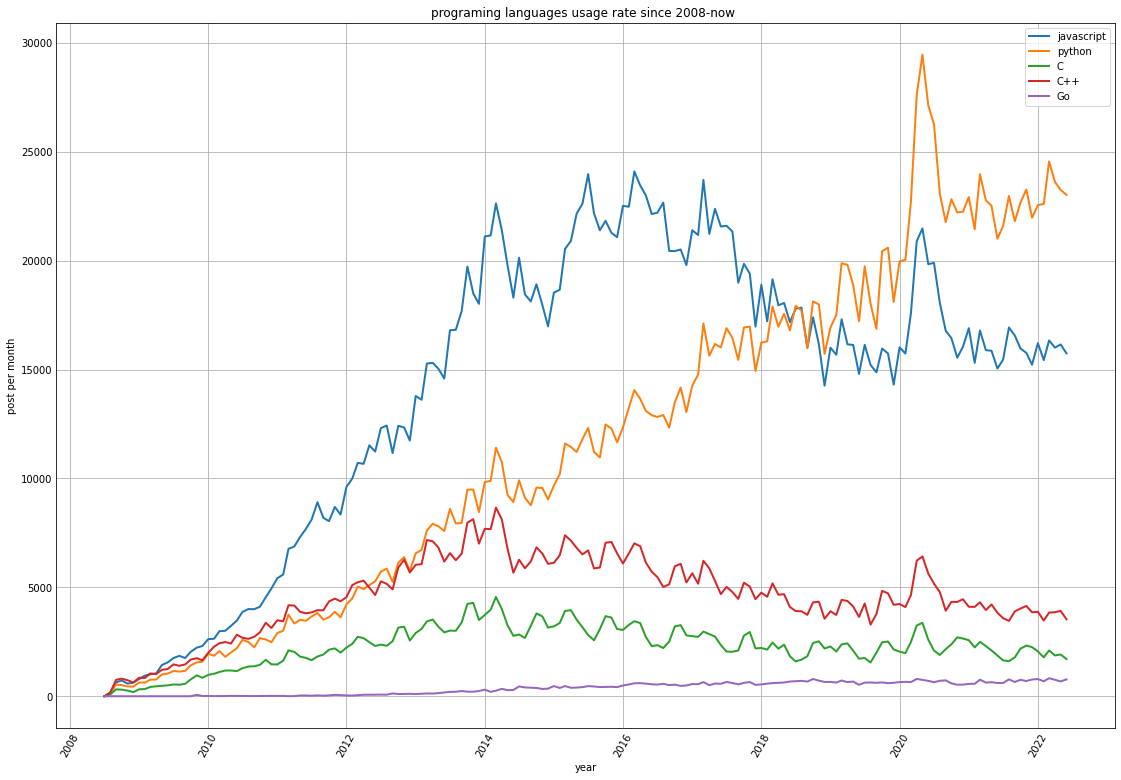

In [166]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
date_list = reshaped_df.index.date # as x-axis in chart
java_post = reshaped_df['javascript'].tolist() # as y-axis in chart

# plot
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=60)

# chart name
plt.title("programing languages usage rate since 2008-now ")

# axis names 
plt.xlabel('year')
plt.ylabel('post per month')




plt.plot(date_list, java_post , linewidth=2.0, label="javascript")
plt.plot(date_list, python_post , linewidth=2.0, label="python")
plt.plot(date_list, c_post , linewidth=2.0, label="C")
plt.plot(date_list, cplos_post , linewidth=2.0, label="C++")
plt.plot(date_list, go_post , linewidth=2.0, label="Go")

plt.legend() # name for each line 

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

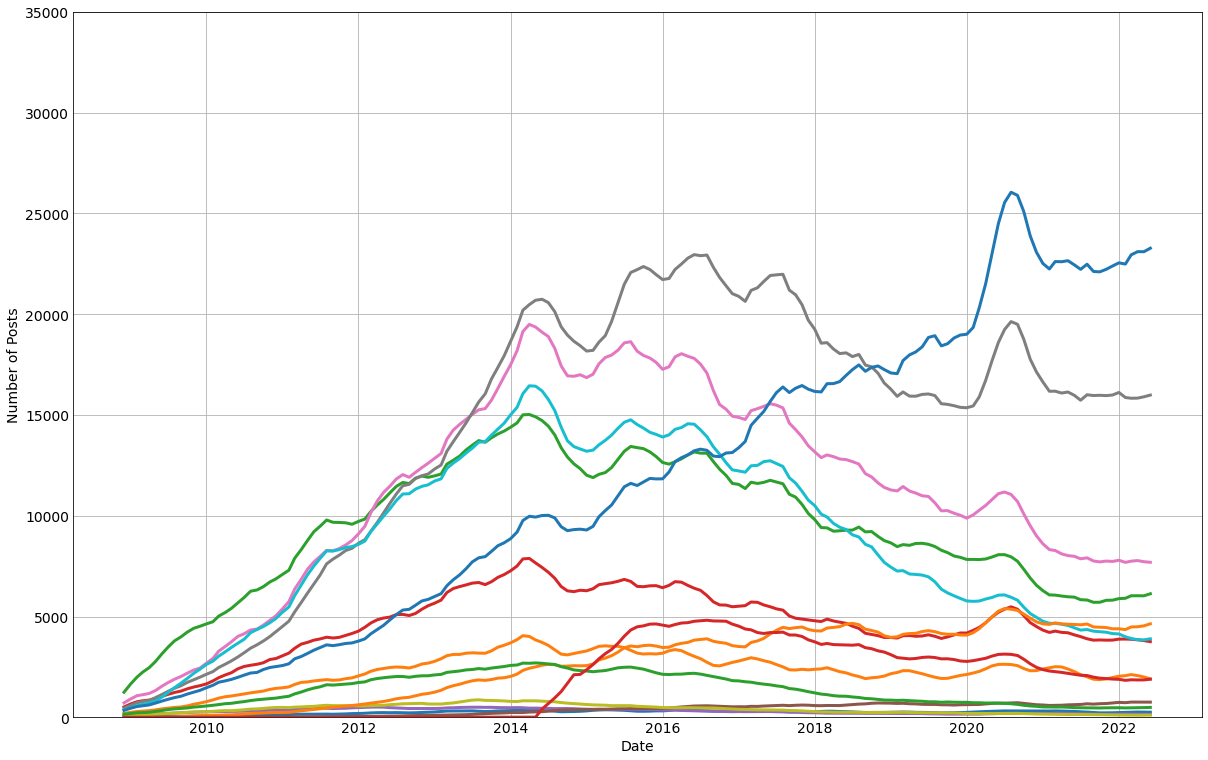

In [167]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)


Matplotlib

To create our first charts we're going to use a library called Matplotlib. There are many different libraries in Python to help us create charts and graphs. Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas, so let's check it out.

First, we have to import Matplotlib.

import matplotlib.pyplot as plt



You can actually show a line chart for the popularity of a programming language using only a single line of code. Can you use the .plot() documentation to figure out how to do this? Try and plot the popularity of the Java programming language. Here's what you're aiming for:

Solution

All you need to do is supply the values for the horizontal axis (the x-values) and the vertical axis (the y-values) for the chart. The x-values are our dates and the y-values are the number of posts. We can supply these values to the .plot() function by position like so:

plt.plot(reshaped_df.index, reshaped_df.java)

or like so if you prefer the square bracket notation.

plt.plot(reshaped_df.index, reshaped_df['java'])


Styling the Chart

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound


To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.

plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

This will make our chart easier to see. But when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to read:

Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


Challenge


Now that you've successfully created and styled your chart, can you figure out how to plot both Java and Python next to each other? The result should look something like this:

Solution: Two Line Charts Next to Each Other

The trick is simply calling the .plot() method twice. That's all there is to it! =)

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python) # Tadah!

But what if we wanted to plot all the programming languages on the same chart? We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

This will allow us to iterate over each column in the DataFrame and plot it on our chart. The final result should look like this:

But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language. Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth). Then let's add a legend to our chart:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16) 

We should now see something like this:

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! =) 




Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes. This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average. By averaging say, 6 or 12 observations we can construct something called the rolling mean. Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean(). We can chain these two methods up to create a DataFrame made up of the averaged observations.

# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

Now our chart looks something like this:

Play with the window argument (use 3 or 12) and see how the chart changes!

<h1>learning points</h1>

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

    used .groupby() to explore the number of posts and entries per programming language

    converted strings to Datetime objects with to_datetime() for easier plotting

    reshaped our DataFrame by converting categories to columns using .pivot()

    used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

    created (multiple) line charts using .plot() with a for-loop

    styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

    added a legend to tell apart which line is which by colour

    smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.


Well done for completing today's lessons! Have a good rest. I'll see you tomorrow! 